In [63]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
import os
import torch

In [2]:
def realWorldProject(uv, Tf, K, depthf):
    K_inv = np.array(
        [
            [1 / K[0, 0], 0.0, -K[0, 2] / K[0, 0]],
            [0.0, 1 / K[1, 1], -K[1, 2] / K[1, 1]],
            [0.0, 0.0, 1.0],
        ]
    )

    tmp = np.concatenate([uv, np.ones((1, uv.shape[1]))])
    tmp = K_inv @ tmp
    if isinstance(uv, np.ndarray):
        tmp = tmp * depthf[uv[1].astype(np.int64), uv[0].astype(np.int64)].numpy()
    else:
        tmp = (
            tmp * depthf[uv[1].long(), uv[0].long()].numpy()
        )  # real world in camera coordinates
    tmp = np.concatenate([tmp, np.ones((1, tmp.shape[1]))])
    tmp = Tf @ tmp  # real world coordinates
    tmp = tmp[:3, :]  # real world coordinates

    return tmp

In [3]:
K = np.loadtxt('/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/intrinsic/intrinsic_color.txt')

In [48]:
trajs = sorted(glob.glob('/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/*.txt'), key=lambda x: int(x.split('/')[-1].split('.')[0]))
#trajs = sorted([os.path.join(*d.split('/')[:-1], f'{int(d.split("/")[-1].split(".")[0]):05d}.txt') for d in trajs])
trajs

['/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/0.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/1.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/2.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/3.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/4.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/5.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/6.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/7.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/8.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/9.txt',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/pose/10.txt',
 '/home/rozenberszki/project/wsnsl/Dataset

In [52]:
l = []
for traj in trajs:
    l.append(np.loadtxt(traj)[None])
poses = np.concatenate(l, axis=0)
poses.shape

(855, 4, 4)

In [53]:
poses  = poses.reshape(-1, 16)

In [54]:
np.savetxt('/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/traj.txt', poses)

In [55]:
poses = np.loadtxt('/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/traj.txt').reshape(-1, 4, 4)
poses.shape

(855, 4, 4)

In [56]:
depths = sorted(glob.glob('/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/*'), key=lambda x: int(x.split('/')[-1].split('.')[0]))
depths

['/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/0.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/1.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/2.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/3.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/4.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/5.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/6.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/7.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/8.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/9.png',
 '/home/rozenberszki/project/wsnsl/Datasets/Scannet/scene0423_02_panoptic/depth/10.png',
 '/home/rozenberszki/project/ws

In [57]:
png_depth_scale = 1000

In [58]:
depth_data = cv2.imread(depths[0], cv2.IMREAD_UNCHANGED)
depth_data = depth_data.astype(np.float32) / png_depth_scale
depth = np.array(depth_data)


In [60]:
a = np.array([1,2,3,4])
np.where(a == 1)

(array([0]),)

In [61]:
depth.shape

(480, 640)

In [66]:
out = realWorldProject(np.array(np.where(depth > 0))[::-1], poses[0], K, torch.from_numpy(depth))

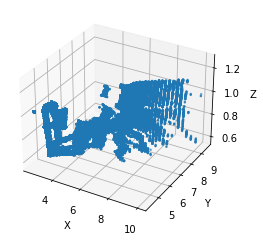

In [69]:
import matplotlib.pyplot as plt

# Assuming 'out' is the variable containing the array
x = out[0]  # x-coordinates
y = out[1]  # y-coordinates
z = out[2]  # z-coordinates

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

In [67]:
import numpy as np

out_min = np.min(out, axis=1)
out_max = np.max(out, axis=1)
out_min, out_max


(array([2.40382543, 4.27239023, 0.57839925]),
 array([10.01266916,  9.53074503,  1.26252689]))